In [1]:
import urllib.request
import json
import numpy as np
import PIL.Image as Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import jieba
%matplotlib inline

In [2]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zq/bjqy43y14_dgx166vhc4n0yw0000gn/T/jieba.cache
Loading model cost 1.125 seconds.
Prefix dict has been built succesfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学


In [3]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

Default Mode: 我/ 来到/ 北京/ 清华大学


In [4]:
seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

他, 来到, 了, 网易, 杭研, 大厦


In [5]:
seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


# encoding=utf-8

# app name word cloud

## US

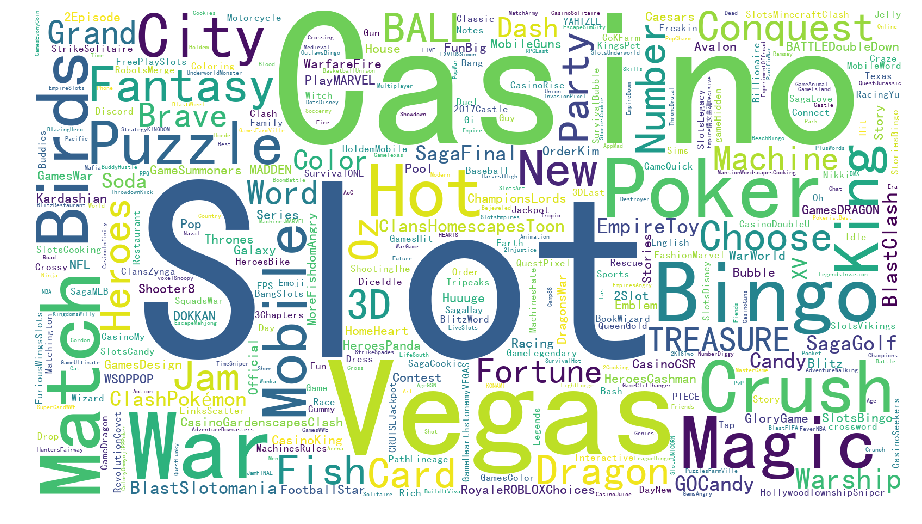

In [6]:
us = urllib.request.urlopen("https://itunes.apple.com/us/rss/topgrossingapplications/limit=200/genre=6014/json").read().decode("utf8")
us = json.loads(us)

usNameStr = ""    
for i in us["feed"]["entry"]:
    name = i["im:name"]["label"]
    usNameStr += name

wordCloud = WordCloud(max_words = 2000, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(usNameStr)

plt.figure(figsize=(16, 9))
plt.imshow(wordCloud)
#plt.title("US App Store Top 200 Grossing Games Name Wordcloud")
plt.axis("off")
wordCloud.to_file( "US.png")

## CN

In [7]:
cn = urllib.request.urlopen("https://itunes.apple.com/cn/rss/topgrossingapplications/limit=200/genre=6014/json").read().decode("utf8")
cn = json.loads(cn)

### cut all = false word split

In [8]:
cnNameStr = ""
    #name = i["name"]#.replace(" ", "")
    #cnNameStr +=name

for i in cn["feed"]["entry"]:
    name = i["im:name"]["label"]
    cnNameStr += name
cnNameStr

wordlist = jieba.cut(cnNameStr, cut_all=False)
word_space_split=" ".join(wordlist)
wordCloud = WordCloud(max_words = 2000, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(word_space_split)

plt.figure(figsize=(16, 9), dpi=1000)
plt.imshow(wordCloud)

#plt.title("CN App Store Top 200 Grossing Games Name Wordcloud")
plt.axis("off")
#plt.imsave("CN.png",wordCloud)
wordCloud.to_file( "CNFalse.png")

### Cut for search word split

In [9]:
wordlist = jieba.cut_for_search(cnNameStr)
word_space_split=" ".join(wordlist)
wordCloud = WordCloud(max_words = 2000, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(word_space_split)

plt.figure(figsize=(16, 9), dpi=1000)
plt.imshow(wordCloud)

#plt.title("CN App Store Top 200 Grossing Games Name Wordcloud")
plt.axis("off")
#plt.imsave("CN.png",wordCloud)
wordCloud.to_file( "CNCutForSearch.png")

# App description word cloud

## US

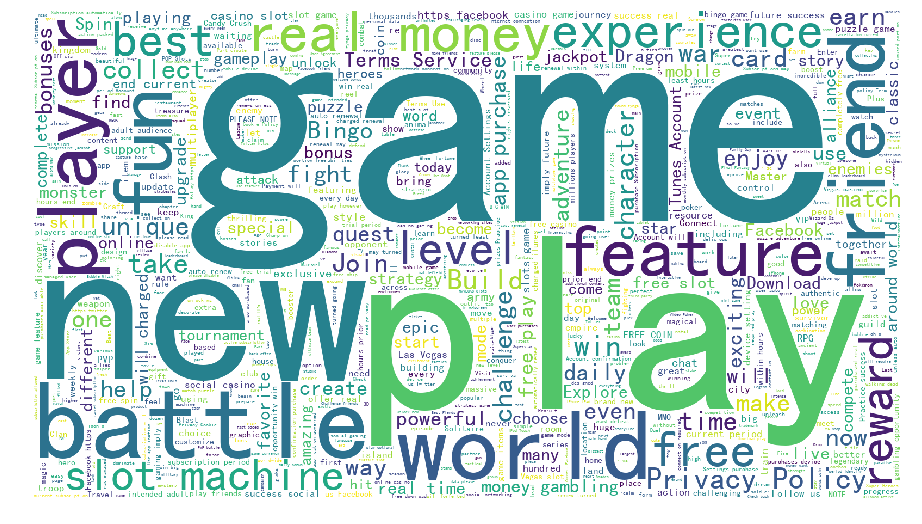

In [10]:
usDescriptionStr = ""    
for i in us["feed"]["entry"]:
    name = i["summary"]["label"]
    usDescriptionStr += name

wordCloud = WordCloud(max_words = 800, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(usDescriptionStr)

plt.figure(figsize=(16, 9))
plt.imshow(wordCloud)
#plt.title("US App Store Top 200 Grossing Games Description Wordcloud")
plt.axis("off")
wordCloud.to_file( "USDescription.png")

## CN

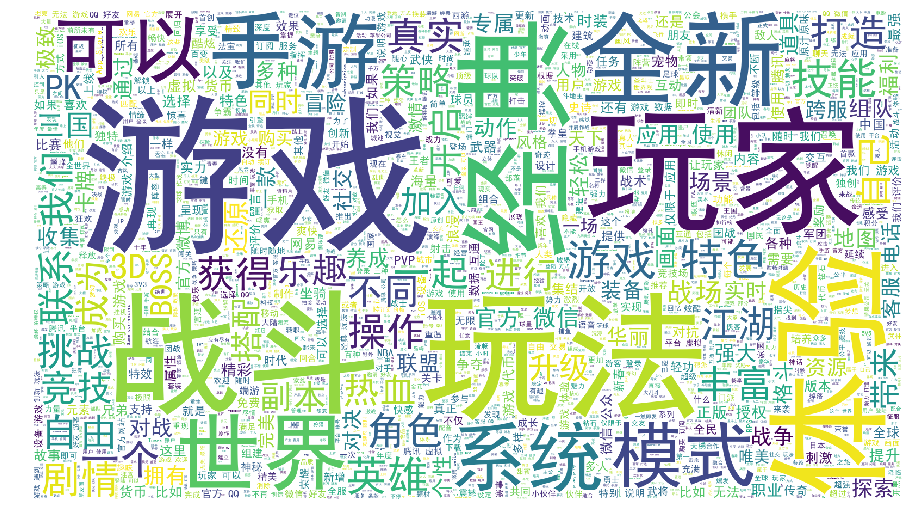

In [11]:
cnDescriptionStr = ""    
for i in cn["feed"]["entry"]:
    name = i["summary"]["label"]
    cnDescriptionStr += name

wordlist = jieba.cut(cnDescriptionStr, cut_all=False)
word_space_split=" ".join(wordlist)
wordCloud = WordCloud(max_words = 2000, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(word_space_split)

plt.figure(figsize=(16, 9))
plt.imshow(wordCloud)
#plt.title("CN App Store Top 200 Grossing Games Description Wordcloud")
plt.axis("off")
wordCloud.to_file( "cnDescription.png")

In [12]:
#prettyprint json
print(json.dumps(us, indent=4, sort_keys=True))

{
    "feed": {
        "author": {
            "name": {
                "label": "iTunes Store"
            },
            "uri": {
                "label": "http://www.apple.com/itunes/"
            }
        },
        "entry": [
            {
                "category": {
                    "attributes": {
                        "im:id": "6014",
                        "label": "Games",
                        "scheme": "https://itunes.apple.com/us/genre/ios-games/id6014?mt=8&uo=2",
                        "term": "Games"
                    }
                },
                "id": {
                    "attributes": {
                        "im:bundleId": "com.midasplayer.apps.candycrushsaga",
                        "im:id": "553834731"
                    },
                    "label": "https://itunes.apple.com/us/app/candy-crush-saga/id553834731?mt=8&uo=2"
                },
                "im:artist": {
                    "attributes": {
                        "href"

In [13]:
print(json.dumps(cn, indent=4, sort_keys=True))

{
    "feed": {
        "author": {
            "name": {
                "label": "iTunes Store"
            },
            "uri": {
                "label": "http://www.apple.com/itunes/"
            }
        },
        "entry": [
            {
                "category": {
                    "attributes": {
                        "im:id": "6014",
                        "label": "\u6e38\u620f",
                        "scheme": "https://itunes.apple.com/cn/genre/ios-%E6%B8%B8%E6%88%8F/id6014?mt=8&uo=2",
                        "term": "Games"
                    }
                },
                "id": {
                    "attributes": {
                        "im:bundleId": "com.tencent.smoba",
                        "im:id": "989673964"
                    },
                    "label": "https://itunes.apple.com/cn/app/%E7%8E%8B%E8%80%85%E8%8D%A3%E8%80%80/id989673964?mt=8&uo=2"
                },
                "im:artist": {
                    "attributes": {
        